In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pickle

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_parquet("/workspaces/mlops-zoomcamp/env1/01-intro/data/green_tripdata_2021-01.parquet")


In [30]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [ ]:
td = df.duration.iloc[0]

In [143]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [112]:
df = df[df.trip_type == 2]

In [149]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


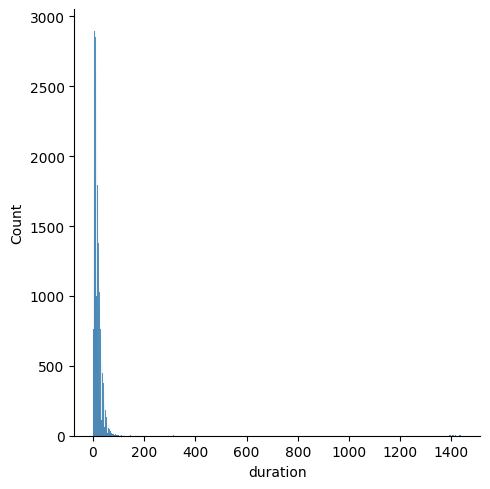

In [147]:
sns.displot(df.duration)

In [68]:
df.duration.describe(percentiles = [0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [150]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [151]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [152]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [153]:
train_dicts = df[categorical + numerical].to_dict(orient ='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
Y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_train)

mean_squared_error(Y_train, y_pred, squared=False)

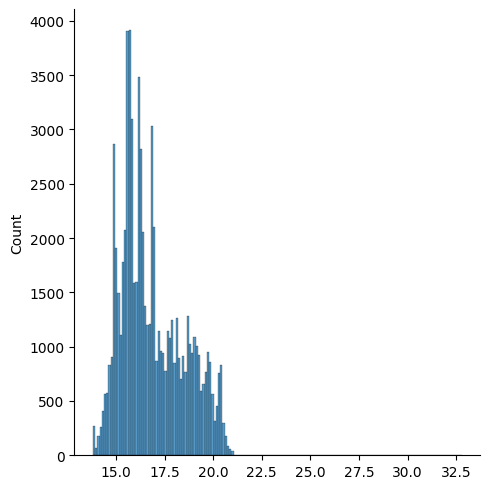

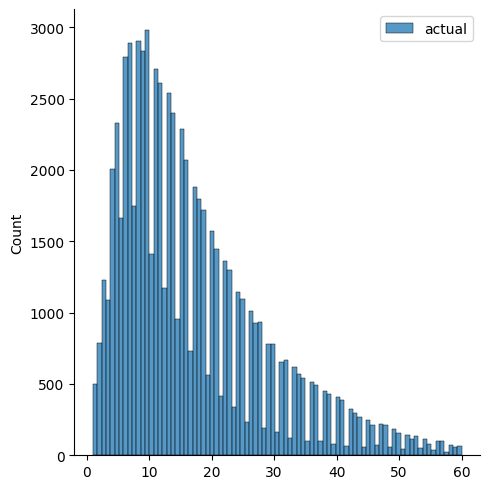

In [165]:
sns.displot(y_pred, label ='prediction')
sns.displot(Y_train, label ='actual')

plt.legend()

In [ ]:
"C:\\Users\\Etikala_Kasirao\\Downloads\\green_tripdata_2021-01.parquet"

In [183]:
def read_dateframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[((df.duration >= 1) & (df.duration <= 60))]
    #categorical = ['PULocationID', 'DOLocationID']
    #df[categorical] = df[categorical].astype(str)
    return df
    

In [184]:
df_train = read_dateframe("C:\\Users\\Etikala_Kasirao\\Downloads\\green_tripdata_2021-01.parquet")
df_val = read_dateframe("C:\\Users\\Etikala_Kasirao\\Downloads\\green_tripdata_2021-02.parquet")

In [181]:
df_train.columns #len(df_val)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'duration'],
      dtype='object')

In [205]:
df_train.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [213]:
df_train =  df_train.astype({'PULocationID':'str'})
df_train =  df_train.astype({'DOLocationID':'str'})

In [214]:
df_train['PU-DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
#df_val['PU-DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [189]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient ='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient ='records')
X_val = dv.fit_transform(val_dicts)



In [190]:
target = 'duration'
Y_train = df_train[target].values
Y_val = df_val[target].values

In [210]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_val)

mean_squared_error(Y_val, y_pred, squared=False)

12.078673198609527

In [217]:
with open("C:\\Users\\Etikala_Kasirao\\Downloads\\models\\lin_reg.bin", "wb") as f_out:
    pickle.dump((dv, lr), f_out)
          

In [207]:
lr = Lasso(alpha=10)
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_val)

mean_squared_error(Y_val, y_pred, squared=False)

12.082925922336656

In [208]:
lr = Ridge(alpha=10)
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_val)

mean_squared_error(Y_val, y_pred, squared=False)

12.078673199226511

In [35]:
df_train1 =pd.read_parquet("C:\\Users\\Etikala_Kasirao\\Downloads\\yellow_tripdata_2023-01.parquet")
df_val1 = pd.read_parquet("C:\\Users\\Etikala_Kasirao\\Downloads\\yellow_tripdata_2023-02.parquet")

In [36]:
shape = df_train1.shape
print("number of columns:", shape[1])

number of columns: 19


In [37]:
df_val1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.00,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.00,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN


In [13]:
df_train1['duration'] = df_train1['tpep_dropoff_datetime'] - df_train1['tpep_pickup_datetime']
df_train1.duration = df_train1.duration.apply(lambda td: td.total_seconds() / 60)

df_val1['duration'] = df_val1['tpep_dropoff_datetime'] - df_val1['tpep_pickup_datetime']
df_val1.duration = df_val1.duration.apply(lambda td: td.total_seconds() / 60)


In [15]:
df_train1.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [278]:
df = df_train1[df_train1['duration'] <1]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
61,2,2023-01-01 00:42:11,2023-01-01 00:43:02,1.0,0.03,1.0,N,163,163,2,3.00,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.0,0.850000
95,2,2023-01-01 00:20:38,2023-01-01 00:21:26,1.0,0.08,1.0,N,75,75,2,3.00,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0,0.800000
311,2,2023-01-01 00:12:04,2023-01-01 00:12:27,3.0,0.27,1.0,N,194,194,2,3.70,1.0,0.5,0.00,13.1,1.0,19.30,0.0,0.0,0.383333
333,1,2023-01-01 00:57:44,2023-01-01 00:57:59,1.0,0.00,1.0,N,137,137,3,3.00,3.5,0.5,0.00,0.0,1.0,8.00,2.5,0.0,0.250000
398,2,2023-01-01 00:28:04,2023-01-01 00:28:35,1.0,0.00,2.0,N,142,142,2,70.00,0.0,0.5,0.00,0.0,1.0,74.00,2.5,0.0,0.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063550,2,2023-01-30 14:57:44,2023-01-30 14:58:06,NaN,0.00,NaN,None,238,238,0,14.40,0.0,0.5,3.68,0.0,1.0,22.08,NaN,NaN,0.366667
3064053,2,2023-01-30 18:22:57,2023-01-30 18:23:38,NaN,0.00,NaN,None,125,125,0,15.21,0.0,0.5,2.88,0.0,1.0,22.09,NaN,NaN,0.683333
3065415,1,2023-01-31 10:18:31,2023-01-31 10:18:40,NaN,0.00,NaN,None,143,143,0,22.22,0.0,0.5,0.00,0.0,1.0,26.22,NaN,NaN,0.150000
3066039,1,2023-01-31 17:16:56,2023-01-31 17:16:56,NaN,0.00,NaN,None,152,152,0,33.36,0.0,0.5,0.00,0.0,1.0,37.36,NaN,NaN,0.000000


In [245]:
df_train1.duration.describe(percentiles =[0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [259]:
df_train1.duration.std()

42.594351241920904

In [260]:
df_train1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [23]:
df_filter = df_train1[((df_train1.duration >1) & (df_train1.duration <60))]
df_val1 = df_val1[((df_val1.duration >1) & (df_val1.duration <60))]
# df = df[((df.duration >= 1) & (df.duration <= 60))]

In [286]:
fraction_left = len(df_filter)/len(df_train1) * 100
print(f"Fraction of records left after dropping outliers: {fraction_left:.4f}")

Fraction of records left after dropping outliers: 98.1115


In [25]:
dropofflocationIDs = ['PULocationID', 'DOLocationID']
#df_filter[dropofflocationIDs] = df_filter[dropofflocationIDs].astype(str)
#df_val1[dropofflocationIDs] = df_val1[dropofflocationIDs].astype(str)

dv = DictVectorizer()
train_dicts =df_filter[dropofflocationIDs].to_dict(orient ='records')
X_train = dv.fit_transform(train_dicts)

val_dicts =df_val1[dropofflocationIDs].to_dict(orient ='records')
X_val = dv.fit_transform(val_dicts)


In [17]:
X_train.shape[1]

515

In [26]:
Y_train = df_filter['duration'].values
Y_val = df_val1['duration'].values

In [33]:
lr = LinearRegression()
lr.fit(X_val, Y_val)

LinearRegression()

In [31]:
y_pred = lr.predict(X_train)
mean_squared_error(Y_train, y_pred, squared=False)

7.647512082313221

In [34]:
y_pred = lr.predict(X_val)
mean_squared_error(Y_val, y_pred, squared=False)

7.7747920178215235